In [1]:
# required dependencise (packages)

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# featuring the data set

column_names= ['MovieID','Title','Genre']
df=pd.read_csv('movies.dat',header= None, names=column_names,sep='::',encoding='latin-1')


In [3]:
# data view

df.head(5)

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# slicing

df['Title']=df['Title'].str.slice(0,-7)

In [5]:
# view

df.head()

,MovieID,Title,Genre
0,1,Toy Story,Animation|Children's|Comedy
1,2,Jumanji,Adventure|Children's|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama
4,5,Father of the Bride Part II,Comedy


In [6]:
# Split genres and create a new entry for each of the genre a movie falls into

g = df['Genre'].str.split('|').apply(Series, 1).stack()
g.index = g.index.droplevel(-1)
g.name = 'Genre'
del df['Genre']
df_spliting_gen = df.join(g)

In [7]:
# data view

df_spliting_gen.head()

,MovieID,Title,Genre
0,1,Toy Story,Animation
0,1,Toy Story,Children's
0,1,Toy Story,Comedy
1,2,Jumanji,Adventure
1,2,Jumanji,Children's


In [29]:
# missing value checking

#df_spliting_gen.isnull().sum() # no missing values

In [8]:
names=['UserId', 'MovieID','Rating','Timestamp']
df2=pd.read_csv('ratings.dat',header= None, names=names,sep='::')

In [9]:
# data view

df2.head()

,UserId,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
# missing value checking

#df2.isnull().sum() # no missing values

In [10]:
# data set featuring

cl_name=['UserId','Gender','Age','Occupation','Zipcode']
df3=pd.read_csv('users.dat',header= None, names=cl_name,sep='::')

In [11]:
#data view

df3.head()

,UserId,Gender,Age,Occupation,Zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
# missing value checking

#df3.isnull().sum() # no missing values

In [12]:
# data sets merging

df_new= pd.merge(df2,df3,how='inner', on='UserId')

In [13]:
# data view

df_new.head()

,UserId,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zipcode
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [14]:
# data sets merging

Movie_Data=pd.merge(df_new,df_spliting_gen, how='inner',on='MovieID')
Movie_Data.drop_duplicates(inplace=True)

In [15]:
# more info of the data set

Movie_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101815 entries, 0 to 2101814
Data columns (total 10 columns):
UserId        int64
MovieID       int64
Rating        int64
Timestamp     int64
Gender        object
Age           int64
Occupation    int64
Zipcode       object
Title         object
Genre         object
dtypes: int64(6), object(4)
memory usage: 176.4+ MB


In [16]:
# Statistical analysis

#Movie_Data.describe()

In [17]:
Movie_Data.head()

,UserId,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zipcode,Title,Genre
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest,Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest,Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest,Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest,Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest,Drama


In [18]:
# Best Rated Movie
md=Movie_Data[['Title', 'Rating']].sort_values(by=['Rating'], ascending=False)
md.drop_duplicates(inplace=True)

In [19]:
# checking after duplicate removing

md.head()

,Title,Rating
0,One Flew Over the Cuckoo's Nest,5
1377902,From Dusk Till Dawn,5
497435,Young Guns II,5
497807,Caddyshack,5
496551,Young Guns,5


<Figure size 864x576 with 0 Axes>

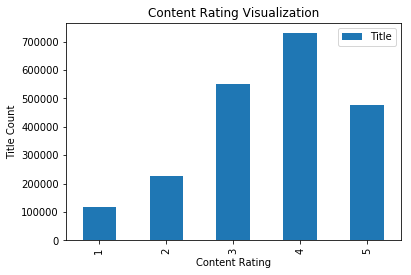

In [20]:
# ploting 

plt.figure(figsize=(12,8))
Movie_Data[['Rating','Title']].groupby('Rating').count().plot(kind='bar', title='Content Rating Visualization')
plt.xlabel('Content Rating')
plt.ylabel('Title Count')
plt.show()

In [21]:
# longest movie

Movie_Data[['Title','Timestamp']].sort_values(by=['Timestamp'], ascending=False).head(5)

,Title,Timestamp
1867457,Plan 9 from Outer Space,1046454590
1867458,Plan 9 from Outer Space,1046454590
2027954,"Mummy, The",1046454548
1241279,Buffy the Vampire Slayer,1046454548
1241278,Buffy the Vampire Slayer,1046454548


In [22]:
# Average duration of the movie

mean_duration =round(Movie_Data['Timestamp'].mean(),3)/60
print("Average value of duration is {} sec.".format(mean_duration))

Average value of duration is 16199988.873166667 sec.


In [23]:
# Occupation and Genre

Movie_Data[['Occupation','Genre']].sort_values(by=['Genre'], ascending=False).head(5)

,Occupation,Genre
1635243,12,Western
2030174,14,Western
2030161,17,Western
1688356,14,Western
2030162,20,Western


In [24]:
# Age and Genre

Movie_Data[['Age','Genre']].sort_values(by=['Age'], ascending=False).head()

,Age,Genre
438297,56,Drama
1444152,56,Film-Noir
963521,56,Comedy
1095718,56,Sci-Fi
1095717,56,Fantasy


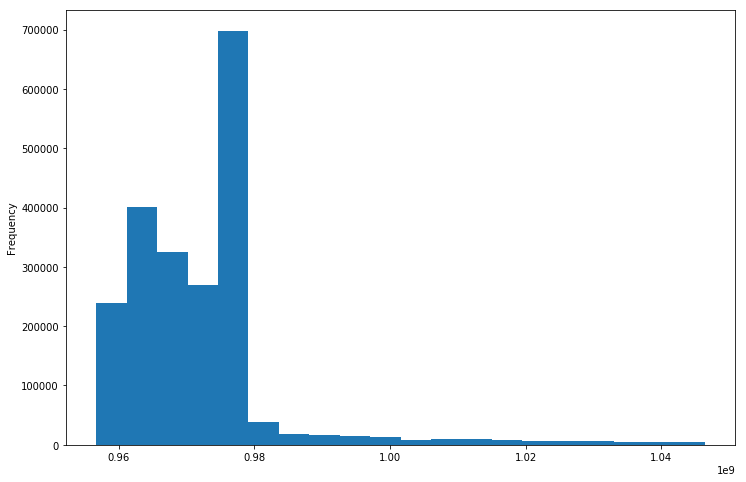

In [25]:
# create a histogram of duration

plt.figure(figsize=(12,8))
Movie_Data['Timestamp'].plot(kind='hist', bins=20)
plt.show()

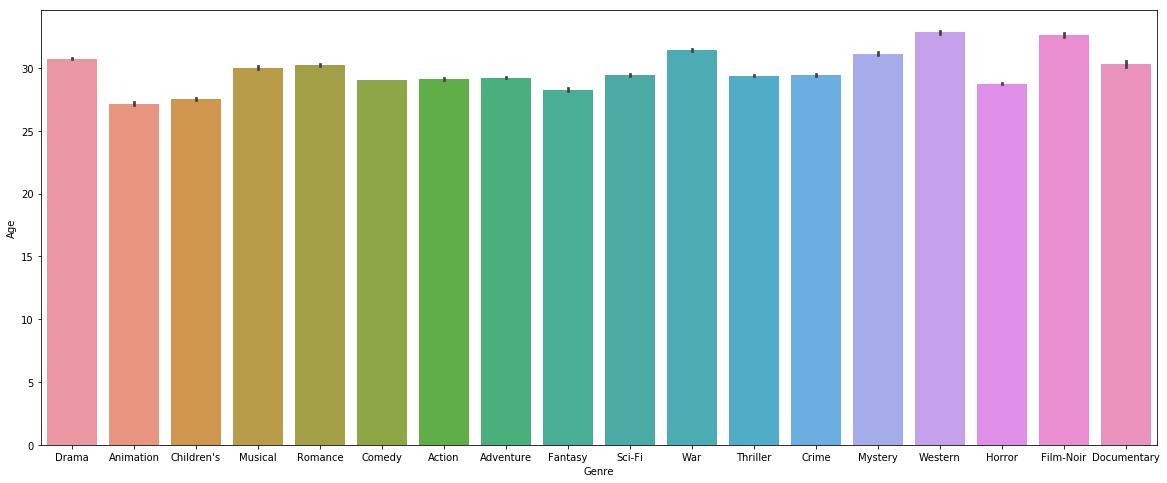

In [28]:
# plotting 

plt.figure(figsize=(20,8))
sns.barplot(x='Genre',y='Age',data=Movie_Data)
plt.show()

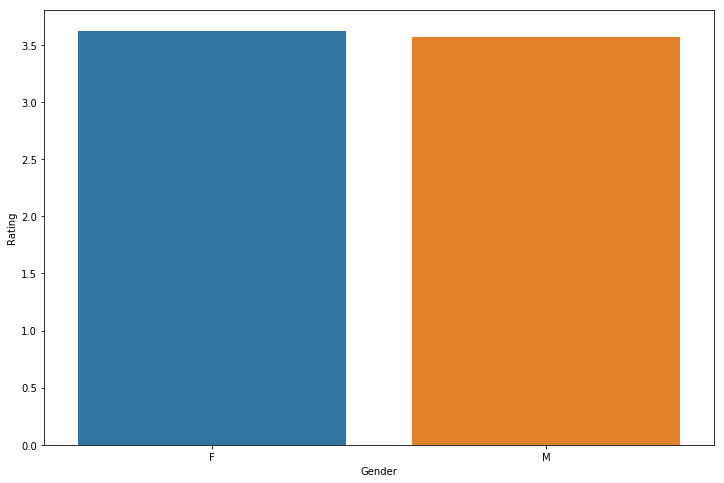

In [27]:
# plotting (Gender and Rating)

plt.figure(figsize=(12,8))
sns.barplot(x='Gender',y='Rating', data=Movie_Data)
plt.show()